#  逻辑回归

简明全套教程及推导见下   
https://blog.csdn.net/jk123vip/article/details/80591619   
调参参数详解见下   
http://www.cnblogs.com/pinard/p/6035872.html   
参数与返回值见下   
https://blog.csdn.net/u013019431/article/details/79982258   
lr的lossfunc交叉熵解释见下  
https://baijiahao.baidu.com/s?id=1618702220267847958&wfr=spider&for=pc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(suppress=True)

## 0预备工作 做数据

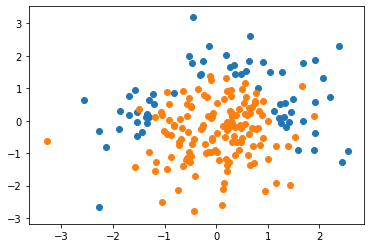

In [3]:
np.random.seed(233)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5,dtype='int')

# 随机抽取 20 个样本，让其分类为 1，相当于认为更改数据，添加噪音
for _ in range(20):
    y[np.random.randint(200)] = 1

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 1做逻辑回归

In [5]:
from sklearn.model_selection import train_test_split #自动分类测试集和训练集
from sklearn.linear_model import LogisticRegression  #通用逻辑回归

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=233,test_size=0.2)
print("X_train",X_train.shape)
print("X_test",X_test.shape)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

X_train (160, 2)
X_test (40, 2)


C:\_ide\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
print("系数",log_reg.coef_)
print("截距",log_reg.intercept_ )
print("梯度下降迭代数",log_reg.n_iter_ )
print("几类?",log_reg.classes_)

系数 [[ 0.05732998 -1.16028737]]
截距 [0.89258399]
梯度下降迭代数 [5]
几类? [0 1]


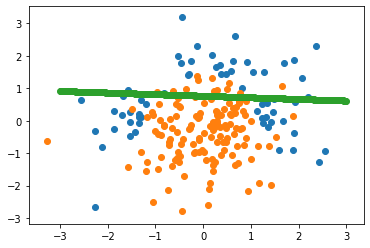

In [7]:
lx=[(i-300)/100 for i in range(600)]
ly=[(-0.89258399-(-0.05732998*i))/(-1.16028737) for i in lx]
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(lx, ly)
plt.show()

##  2做预测并且计算准确率

In [8]:
log_reg.predict([[0,0],[100,100]])

array([1, 0])

In [9]:
log_reg.predict_proba([[0,0],[100,100]])
# 0.7766910701892344   =   1/(1+np.exp(-1.24648653))  故 预测模型就是 1/1+e^-(wx+b)   

array([[0.29057687, 0.70942313],
       [1.        , 0.        ]])

In [10]:
log_reg.predict_log_proba([[0,0],[100,100]])

array([[  -1.23588713,   -0.34330313],
       [   0.        , -109.40315504]])

In [11]:
test_pre=log_reg.predict(X_test)
test_pre

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
right=0
for i in list(zip(test_pre,y_test)):
    if i[0]==i[1]:
        right+=1
right/40

0.775